In [1]:
pip install darts

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\91783\\anaconda3\\lib\\site-packages\\numpy-1.23.1.dist-info\\METADATA'



In [2]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
df = pd.read_csv('D:\AirPassengers\AirPassengers.csv', delimiter=",")

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

In [5]:
from sklearn.preprocessing import normalize

In [6]:
from darts.models import ExponentialSmoothing

train, val = series.split_before(pd.Timestamp('19580101'))

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

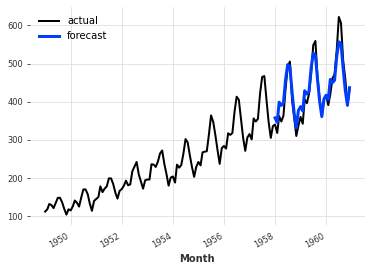

In [7]:
import matplotlib.pyplot as plt

series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

In [8]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

In [9]:
from darts.models import Prophet

models = [ExponentialSmoothing(), Prophet()]

backtests = [model.historical_forecasts(series,
                            start=.5,
                            forecast_horizon=3)
             for model in models]

2022-08-08 12:18:02 prophet INFO: Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2022-08-08 12:18:02 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\91783\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\91783\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\91783\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
2022-08-08 12:18:0

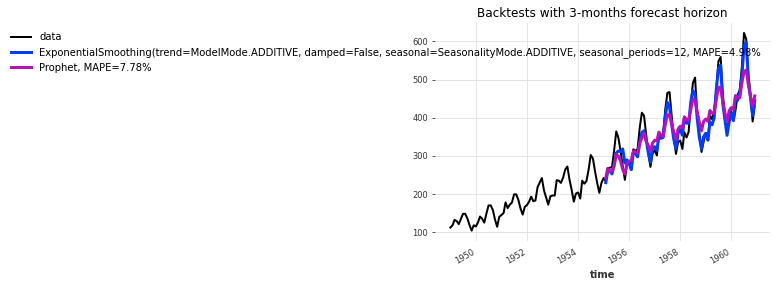

In [11]:
from darts.metrics import mape

series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], series)
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))

plt.title('Backtests with 3-months forecast horizon')
plt.legend()